In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
nanortalik gl
nikolskoye ru
chokurdakh ru
hithadhoo mv
rikitea pf
fort nelson ca
develi tr
nanma cn
bredasdorp za
esperance au
ilulissat gl
bredasdorp za
rungata ki
belushya guba ru
tasiilaq gl
horta pt
tuatapere nz
chagda ru
lebu cl
esperance au
colares pt
tiksi ru
saskylakh ru
zhigansk ru
bilma ne
carnarvon au
busselton au
bannu pk
kodiak us
rikitea pf
mao td
shunyi cn
butaritari ki
marcona pe
saskylakh ru
cherskiy ru
kavaratti in
kavaratti in
tual id
ugoofaaru mv
east london za
acajutla sv
baruun-urt mn
morondava mg
hermanus za
port elizabeth za
qaanaaq gl
ushuaia ar
vredendal za
arraial do cabo br
cape town za
kedrovyy ru
esperance au
avarua ck
castro cl
nizhniy tsasuchey ru
vallenar cl
tuktoyaktuk ca
butaritari ki
rikitea pf
asfi ma
tsihombe mg
east london za
bengkulu id
olafsvik is
mataura pf
nizhneangarsk ru
chuy uy
akyab mm
mutoko zw
veraval in
bluff nz
grand river south east mu
nantucket us
aklavik ca
torbay ca
avarua ck
henties bay na
hermanus za
erenhot cn
maumere i

sur om
cape town za
nishihara jp
havre-saint-pierre ca
albany au
eureka us
khatanga ru
nikolskoye ru
illoqqortoormiut gl
bengkulu id
punta arenas cl
road town vg
thompson ca
naifaru mv
fort nelson ca
pangnirtung ca
raga sd
castro cl
rikitea pf
kadipaten id
eureka us
ushuaia ar
san patricio mx
lata sb
gisborne nz
hermanus za
port elizabeth za
taolanaro mg
punta arenas cl
arman ru
dromolaxia cy
port elizabeth za
ostrovnoy ru
kyren ru
gelibolu tr
rikitea pf
mwinilunga zm
mahebourg mu
rogers us
yar-sale ru
klaksvik fo
padang id
avera pf
port alfred za
hovd mn
saint george bm
port alfred za
sanawad in
tupelo us
kushmurun kz
puerto ayora ec
goderich sl
rikitea pf
rikitea pf
vitimskiy ru
hobart au
asosa et
bluff nz
cape town za
puerto ayora ec
paradwip in
punta arenas cl
illoqqortoormiut gl
pestovo ru
busselton au
lakes entrance au
amga ru
butaritari ki
albany au
neryungri ru
vangaindrano mg
vaini to
bluff nz
saskylakh ru
bonavista ca
kodiak us
qaanaaq gl
ushuaia ar
bluff nz
ushuaia ar
alofi 

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        # Print the city count to confirm sufficient count.
print(len(cities))

640


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

#basic URL for openweathermap info
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | fort nelson
Processing Record 8 of Set 1 | develi
Processing Record 9 of Set 1 | nanma
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | rungata
City not found. Skipping...
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | horta
Processing Record 17 of Set 1 | tuatapere
Processing Record 18 of Set 1 | chagda
City not found. Skipping...
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | colares
Processing Record 21 of Set 1 | tiksi
Process

Processing Record 36 of Set 4 | vestmannaeyjar
Processing Record 37 of Set 4 | husavik
Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | palmas bellas
Processing Record 40 of Set 4 | sitio novo do tocantins
Processing Record 41 of Set 4 | hasaki
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | prince rupert
Processing Record 44 of Set 4 | witten
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | mweka
Processing Record 47 of Set 4 | praia da vitoria
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | tazmalt
Processing Record 50 of Set 4 | muswellbrook
Processing Record 1 of Set 5 | aksarka
Processing Record 2 of Set 5 | jacareacanga
Processing Record 3 of Set 5 | tres arroyos
Processing Record 4 of Set 5 | tabou
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | puerto escondido
Processing Record 8 of Set 5 | nyaunglebin
Processing

Processing Record 25 of Set 8 | los llanos de aridane
Processing Record 26 of Set 8 | neftegorsk
Processing Record 27 of Set 8 | nisia floresta
Processing Record 28 of Set 8 | alice springs
Processing Record 29 of Set 8 | lompoc
Processing Record 30 of Set 8 | wahran
City not found. Skipping...
Processing Record 31 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 32 of Set 8 | cervo
Processing Record 33 of Set 8 | killarney
Processing Record 34 of Set 8 | nguiu
City not found. Skipping...
Processing Record 35 of Set 8 | forbes
Processing Record 36 of Set 8 | gornopravdinsk
Processing Record 37 of Set 8 | sinnamary
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | pontianak
Processing Record 40 of Set 8 | ishigaki
Processing Record 41 of Set 8 | belaya gora
Processing Record 42 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 43 of Set 8 | znamenskoye
Processing Record 44 of Set 8 | goalpara
Processing Record 45 of Se

Processing Record 9 of Set 12 | flinders
Processing Record 10 of Set 12 | tarata
Processing Record 11 of Set 12 | wangkui
Processing Record 12 of Set 12 | watsa
Processing Record 13 of Set 12 | hamilton
Processing Record 14 of Set 12 | taltal
Processing Record 15 of Set 12 | forestville
Processing Record 16 of Set 12 | abnub
Processing Record 17 of Set 12 | rumford
Processing Record 18 of Set 12 | ponta delgada
Processing Record 19 of Set 12 | umm kaddadah
Processing Record 20 of Set 12 | camacha
Processing Record 21 of Set 12 | lakatoro
Processing Record 22 of Set 12 | kovilj
Processing Record 23 of Set 12 | hearst
Processing Record 24 of Set 12 | carutapera
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | moshi
Processing Record 27 of Set 12 | tautira
Processing Record 28 of Set 12 | santa cruz de tenerife
Processing Record 29 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 30 of Set 12 | cajabamba
Processing Record 31 of Set 12 | la

In [11]:
print(len(cities))

640


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
from scipy.stats import linregress
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Vaini,TO,-21.2000,-175.2000,78.96,78,20,10.36,2021-10-25 22:07:34
1,Nanortalik,GL,60.1432,-45.2371,33.76,60,27,7.65,2021-10-25 22:11:19
2,Nikolskoye,RU,59.7035,30.7861,46.87,85,99,9.57,2021-10-25 22:11:19
3,Chokurdakh,RU,70.6333,147.9167,-23.42,100,97,1.77,2021-10-25 22:06:57
4,Hithadhoo,MV,-0.6000,73.0833,83.03,71,87,16.71,2021-10-25 22:11:20
5,Rikitea,PF,-23.1203,-134.9692,75.22,72,86,20.02,2021-10-25 22:11:20
6,Fort Nelson,CA,58.8053,-122.7002,29.79,100,90,0.00,2021-10-25 22:08:22
7,Develi,TR,38.3906,35.4922,33.15,83,34,1.66,2021-10-25 22:11:21
8,Nanma,CN,36.1817,118.1583,50.43,70,100,3.42,2021-10-25 22:11:21
9,Bredasdorp,ZA,-34.5322,20.0403,60.28,90,21,11.18,2021-10-25 22:11:21


In [13]:
city_data_df_sorted = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[city_data_df_sorted ]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2021-10-25 22:07:34,-21.2000,-175.2000,78.96,78,20,10.36
1,Nanortalik,GL,2021-10-25 22:11:19,60.1432,-45.2371,33.76,60,27,7.65
2,Nikolskoye,RU,2021-10-25 22:11:19,59.7035,30.7861,46.87,85,99,9.57
3,Chokurdakh,RU,2021-10-25 22:06:57,70.6333,147.9167,-23.42,100,97,1.77
4,Hithadhoo,MV,2021-10-25 22:11:20,-0.6000,73.0833,83.03,71,87,16.71
...,...,...,...,...,...,...,...,...,...
576,Lima,PE,2021-10-25 22:10:47,-12.0432,-77.0282,62.13,24,90,1.01
577,Duncan,US,2021-10-25 22:14:12,34.5023,-97.9578,80.82,38,1,13.80
578,Christchurch,NZ,2021-10-25 22:13:22,-43.5333,172.6333,61.92,79,90,1.99
579,Jinka,ET,2021-10-25 22:14:12,5.6500,36.6500,66.60,64,80,4.79


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

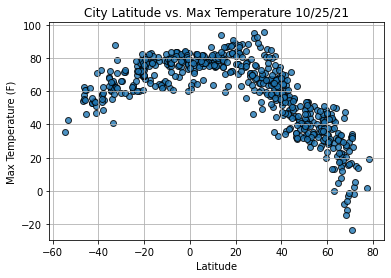

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

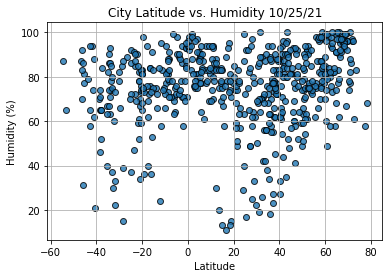

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


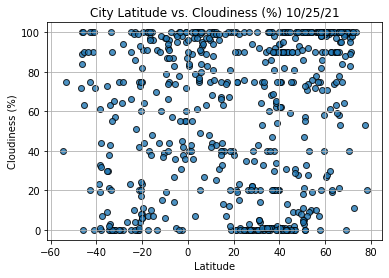

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

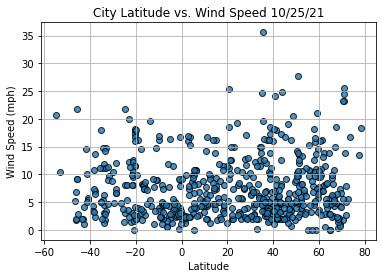

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Nanortalik,GL,2021-10-25 22:11:19,60.1432,-45.2371,33.76,60,27,7.65
2,Nikolskoye,RU,2021-10-25 22:11:19,59.7035,30.7861,46.87,85,99,9.57
3,Chokurdakh,RU,2021-10-25 22:06:57,70.6333,147.9167,-23.42,100,97,1.77
6,Fort Nelson,CA,2021-10-25 22:08:22,58.8053,-122.7002,29.79,100,90,0.00
7,Develi,TR,2021-10-25 22:11:21,38.3906,35.4922,33.15,83,34,1.66


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                        Horta
Country                        PT
Date          2021-10-25 22:11:23
Lat                       38.5333
Lng                      -28.6333
Max Temp                    67.03
Humidity                       77
Cloudiness                     62
Wind Speed                  17.27
Name: 13, dtype: object

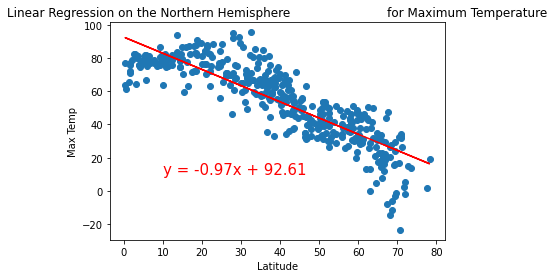

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))

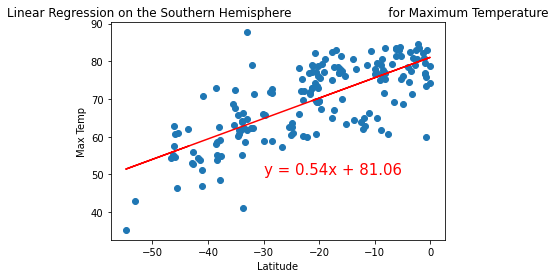

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,50))

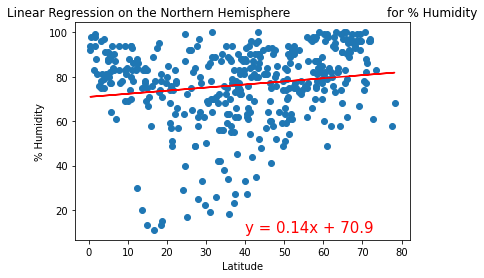

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

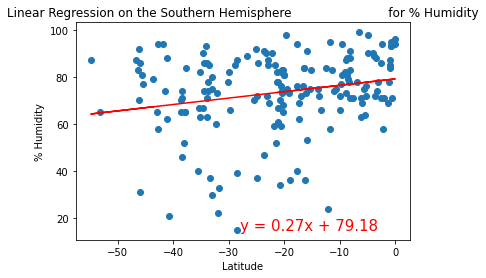

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-28,15))

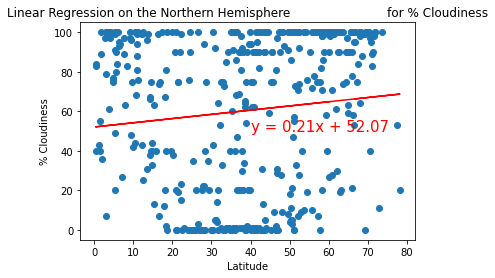

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,50))

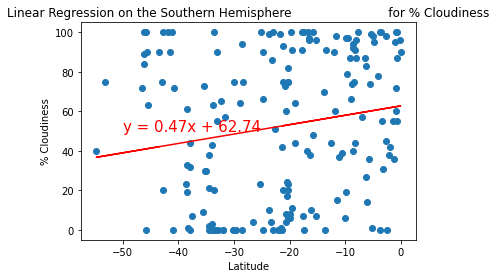

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

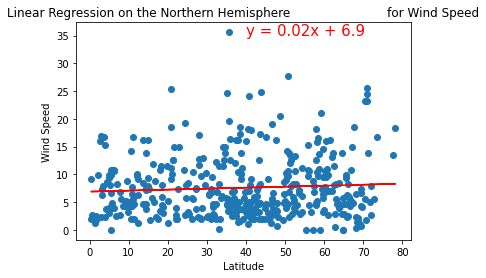

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

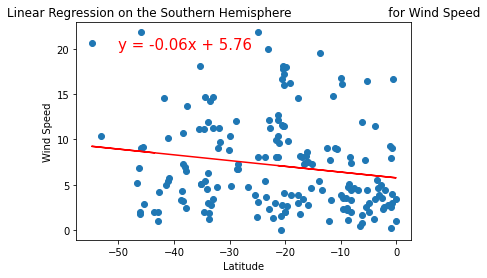

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))